🛠️ Preparación de los Datos

✅ DataFrame cargado correctamente con 7267 filas y 20 columnas.


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40



🔎 Tipos de datos tras transformación:
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Monthly             float64
Total               float64
dtype: object

✅ Codificación completada. Nuevas dimensiones: (7267, 32)

📊 Distribución de la variable objetivo 'Churn':
Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


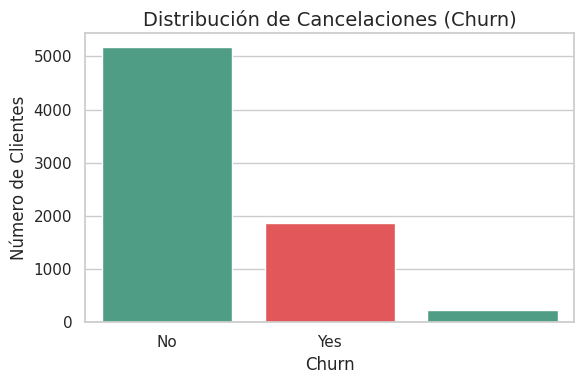


📦 Variables independientes (X): (7267, 31)
🎯 Variable dependiente (y): (7267,)

⚠️ Se encontraron valores nulos. Se imputarán con la media.
✅ Valores nulos imputados.

⚖️ Distribución tras aplicar SMOTE:
Churn_Yes
False    0.5
True     0.5
Name: proportion, dtype: float64


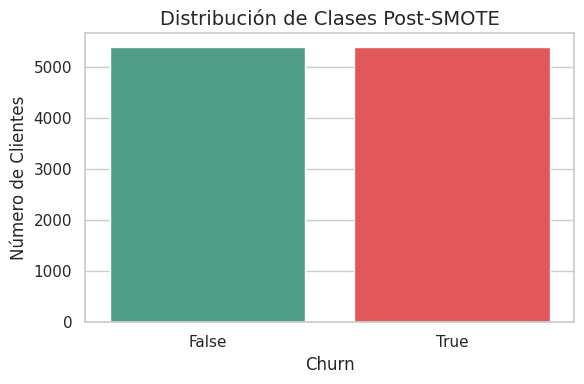


📐 Escalado de variables completado.

🔀 División entre entrenamiento y prueba completada.
X_train: (7557, 31) | X_test: (3239, 31)
y_train: (7557,) | y_test: (3239,)


No Churn     Churn
Variable                   Métrica                    
SeniorCitizen              mean     0.130789  0.254682
                           median        0.0       0.0
                           std      0.337201  0.435799
                           min             0         0
                           max             1         1
...                                      ...       ...
PaymentMethod_Mailed check mean     0.251389  0.164794
                           median        0.0       0.0
                           std      0.433852  0.371094
                           min         False     False
                           max          True      True

[155 rows x 2 columns]

📁 Tabla resumen exportada como resumen_churn.csv


In [60]:
# =============================================================
# SECCIÓN 1 – CARGA, TRANSFORMACIÓN Y PREPARACIÓN DE DATOS
# =============================================================

# 1. Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Estilo visual para los gráficos
sns.set(style='whitegrid')
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# 2. Validación inicial del DataFrame
print(f"✅ DataFrame cargado correctamente con {df.shape[0]} filas y {df.shape[1]} columnas.")
display(df.head())

# =============================================================
# 3. Limpieza y transformación de columnas
# =============================================================

# 3.1 Eliminación de columnas no predictivas
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)
    print("🗑️ Columna 'customerID' eliminada por no aportar valor predictivo.")

# 3.2 Flatten de columnas tipo diccionario
dict_cols = ['customer', 'phone', 'internet', 'account', 'Charges']
for col in dict_cols:
    if col in df.columns:
        df = pd.concat([df.drop(col, axis=1), df[col].apply(pd.Series)], axis=1)
        print(f"🧩 Columna '{col}' desanidada correctamente.")

# 3.3 Verificación de tipos de datos post-flatten
print("\n🔎 Tipos de datos tras transformación:")
print(df.dtypes)

# =============================================================
# 4. Codificación de variables categóricas (One-Hot Encoding)
# =============================================================

# Identificar columnas categóricas para codificar
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Aplicar codificación
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(f"\n✅ Codificación completada. Nuevas dimensiones: {df_encoded.shape}")

# =============================================================
# 5. Análisis de balance de clases (Churn)
# =============================================================

# Revisión distribución original
print("\n📊 Distribución de la variable objetivo 'Churn':")
print(df['Churn'].value_counts(normalize=True))

# Visualización
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Churn'], palette=['#43aa8b', '#f94144'])
plt.title("Distribución de Cancelaciones (Churn)")
plt.xlabel("Churn")
plt.ylabel("Número de Clientes")
plt.tight_layout()
plt.show()

# =============================================================
# 6. Separación de variables predictoras y objetivo
# =============================================================

# Asumimos que 'Churn' es binaria (0 = No Churn, 1 = Churn)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

print(f"\n📦 Variables independientes (X): {X.shape}")
print(f"🎯 Variable dependiente (y): {y.shape}")

# =============================================================
# 7. Manejo de valores nulos
# =============================================================

# Verificar si hay valores nulos
if X.isnull().sum().sum() > 0:
    print("\n⚠️ Se encontraron valores nulos. Se imputarán con la media.")
    X.fillna(X.mean(), inplace=True)
    print("✅ Valores nulos imputados.")

# =============================================================
# 8. Balanceo de clases con SMOTE
# =============================================================

# Inicializar y aplicar SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Mostrar proporción balanceada
print("\n⚖️ Distribución tras aplicar SMOTE:")
print(pd.Series(y_resampled).value_counts(normalize=True))

# Visualizar nueva distribución
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette=['#43aa8b', '#f94144'])
plt.title("Distribución de Clases Post-SMOTE")
plt.xlabel("Churn")
plt.ylabel("Número de Clientes")
plt.tight_layout()
plt.show()

# =============================================================
# 9. Escalado de variables (StandardScaler)
# =============================================================

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

print("\n📐 Escalado de variables completado.")

# =============================================================
# 10. División del dataset en entrenamiento y prueba
# =============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

print("\n🔀 División entre entrenamiento y prueba completada.")
print(f"X_train: {X_train.shape} | X_test: {X_test.shape}")
print(f"y_train: {y_train.shape} | y_test: {y_test.shape}")

# =============================================================
# 11. Tabla resumen descriptiva por clase (opcional para presentación)
# =============================================================

def resumen_por_churn(df_encoded):
    """Resumen estadístico por clase de churn."""
    # Use the one-hot encoded Churn_Yes column for grouping
    resumen = df_encoded.groupby('Churn_Yes').agg(['mean', 'median', 'std', 'min', 'max'])
    resumen = resumen.transpose().round(2)
    # Rename the columns to be more descriptive
    resumen.columns = ['No Churn', 'Churn']
    resumen.index.names = ['Variable', 'Métrica']
    return resumen

# Crear y exportar resumen
tabla_resumen = resumen_por_churn(df_encoded)
display(tabla_resumen)
tabla_resumen.to_csv('/content/telecom-x/resumen_churn.csv')
print("📁 Tabla resumen exportada como resumen_churn.csv")

🎯 Correlación y Selección de Variables

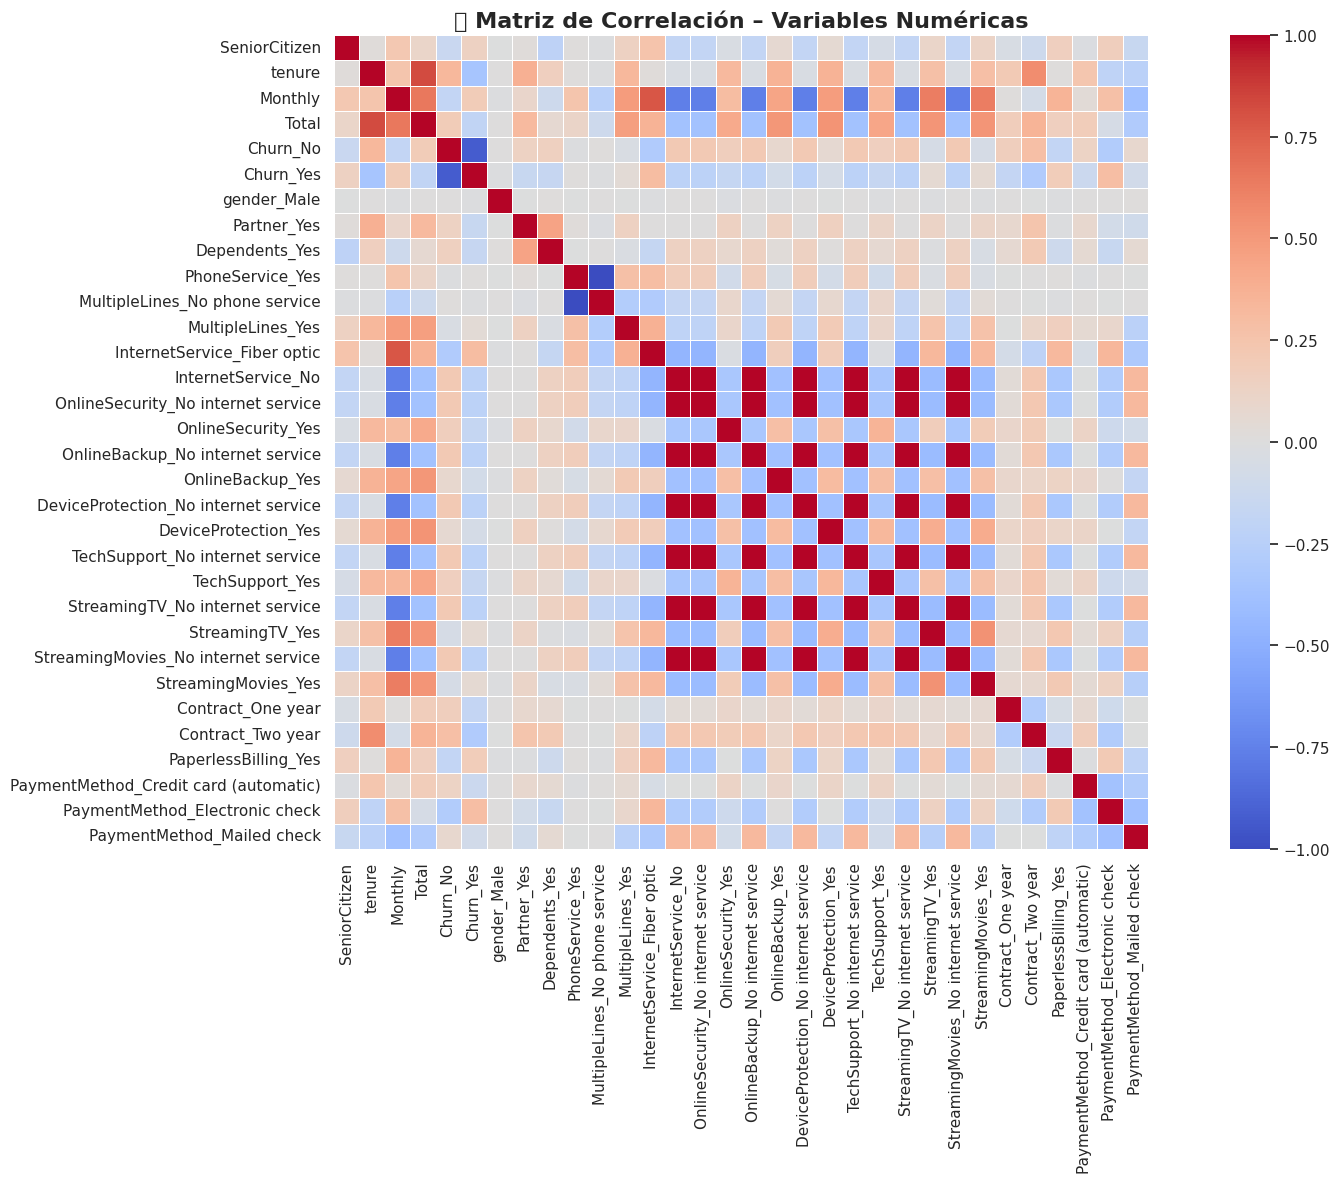

Variable,Correlación
InternetService_Fiber optic,0.301000
PaymentMethod_Electronic check,0.295000
Monthly,0.190000
PaperlessBilling_Yes,0.187000
SeniorCitizen,0.147000
StreamingTV_Yes,0.062000
StreamingMovies_Yes,0.061000
MultipleLines_Yes,0.039000
PhoneService_Yes,0.013000
gender_Male,-0.010000


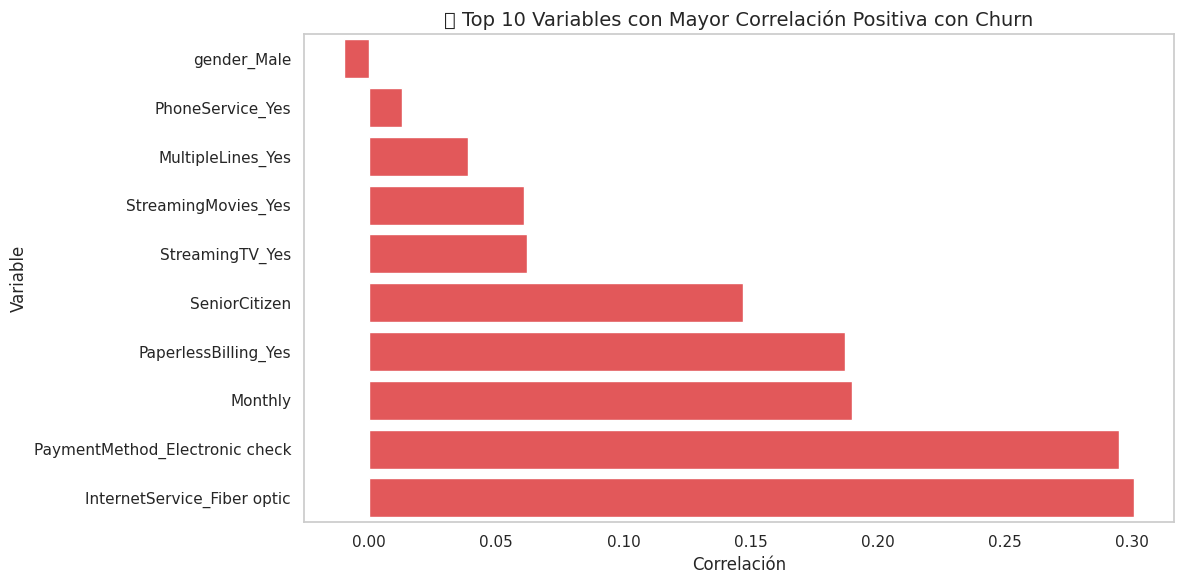

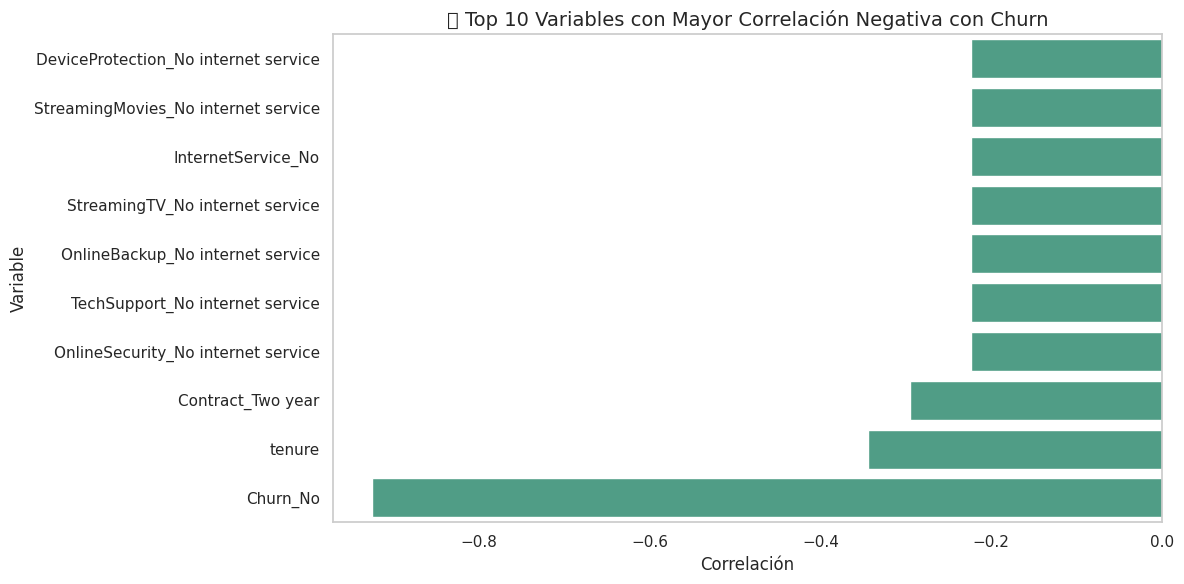

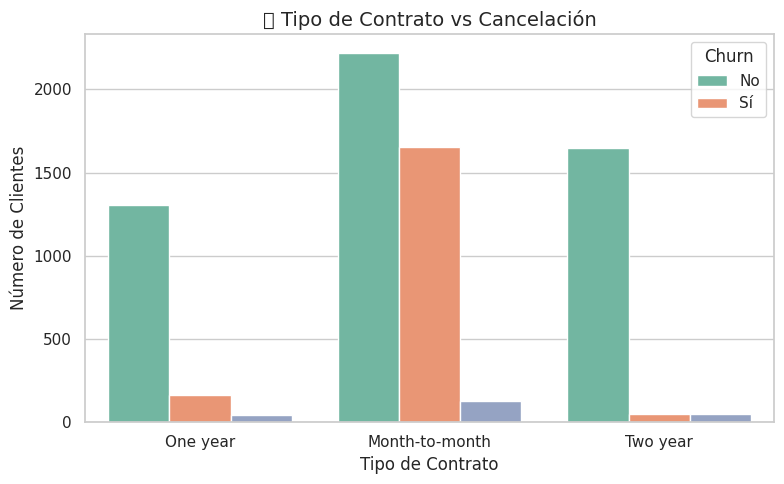

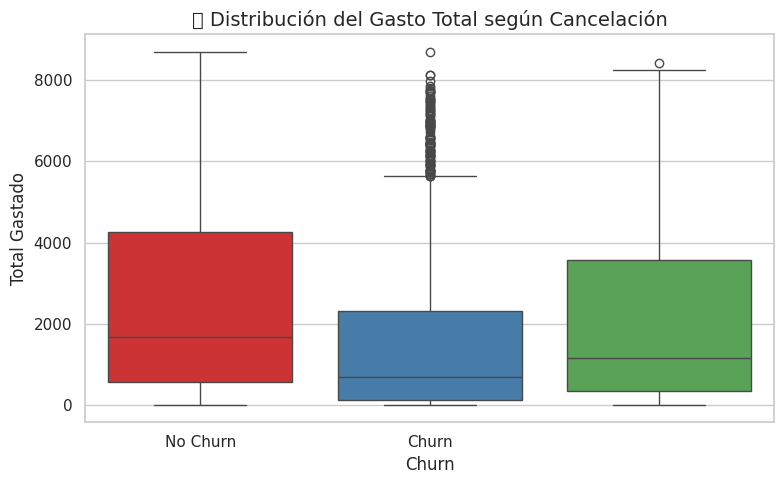

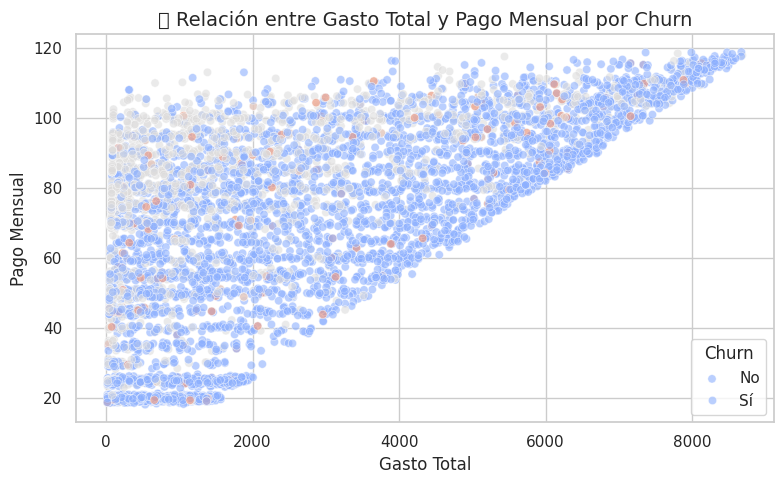

In [65]:
# =============================================================
# SECCIÓN 2 – CORRELACIÓN Y ANÁLISIS DE VARIABLES CLAVE
# =============================================================

# 1. Matriz de correlación completa
corr_matrix = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f", linewidths=0.4, square=True)
plt.title("🔗 Matriz de Correlación – Variables Numéricas", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Correlación con la variable objetivo 'Churn_Yes'
correlation_target = corr_matrix['Churn_Yes'].drop('Churn_Yes').sort_values(ascending=False)
correlation_df = correlation_target.reset_index()
correlation_df.columns = ['Variable', 'Correlación']
correlation_df['Correlación'] = correlation_df['Correlación'].round(3)

# Tabla visualmente profesional con estilos de negocios
styled_corr = correlation_df.style\
    .bar(subset=['Correlación'], align='mid', color=['#43aa8b', '#f94144'])\
    .background_gradient(cmap='RdYlGn', subset=['Correlación'])\
    .set_caption("📌 Variables Más Correlacionadas con la Cancelación (Churn)")\
    .set_table_styles([
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]},
        {'selector': 'thead th', 'props': [('font-size', '13px'), ('text-align', 'center'), ('background-color', '#f0f0f0')]},
        {'selector': 'td', 'props': [('text-align', 'center'), ('font-size', '13px')]}
    ])\
    .hide(axis="index")

display(styled_corr)

# 3. Visualización: Top 10 correlaciones positivas
top_pos = correlation_df.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_pos, y='Variable', x='Correlación', color='#f94144')
plt.title("🔺 Top 10 Variables con Mayor Correlación Positiva con Churn")
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 4. Visualización: Top 10 correlaciones negativas
top_neg = correlation_df.tail(10).sort_values(by='Correlación')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_neg, y='Variable', x='Correlación', color='#43aa8b')
plt.title("🔻 Top 10 Variables con Mayor Correlación Negativa con Churn")
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# =============================================================
# 5. Análisis dirigido – Tipo de Contrato vs Cancelación
# =============================================================
if 'Contract' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
    plt.title("⏳ Tipo de Contrato vs Cancelación")
    plt.xlabel("Tipo de Contrato")
    plt.ylabel("Número de Clientes")
    plt.legend(title='Churn', labels=['No', 'Sí'])
    plt.tight_layout()
    plt.show()

# =============================================================
# 6. Análisis dirigido – Gasto Total vs Cancelación
# =============================================================
if 'Total' in df.columns:
    # Boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['Churn'], y=df['Total'], palette='Set1')
    plt.title("💸 Distribución del Gasto Total según Cancelación")
    plt.xlabel("Churn")
    plt.ylabel("Total Gastado")
    plt.xticks([0, 1], ['No Churn', 'Churn'])
    plt.tight_layout()
    plt.show()

    # Scatterplot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='Total', y='Monthly', hue='Churn', palette='coolwarm', alpha=0.6)
    plt.title("📉 Relación entre Gasto Total y Pago Mensual por Churn")
    plt.xlabel("Gasto Total")
    plt.ylabel("Pago Mensual")
    plt.legend(title='Churn', labels=['No', 'Sí'])
    plt.tight_layout()
    plt.show()


🤖 Modelado Predictivo

In [69]:
# =============================================================
# SECCIÓN 3 – MODELADO PREDICTIVO Y EVALUACIÓN DETALLADA
# =============================================================

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
)

# -------------------------------------------------------------
# 1. Entrenamiento del Modelo 1: Regresión Logística
# -------------------------------------------------------------
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]

# -------------------------------------------------------------
# 2. Entrenamiento del Modelo 2: Random Forest
# -------------------------------------------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# -------------------------------------------------------------
# 3. Evaluación y comparación de modelos
# -------------------------------------------------------------
def evaluar_modelo(nombre, y_true, y_pred, y_proba):
    return {
        'Modelo': nombre,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precisión': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_proba)
    }

metricas = [
    evaluar_modelo("Regresión Logística", y_test, y_pred_log, y_proba_log),
    evaluar_modelo("Random Forest", y_test, y_pred_rf, y_proba_rf)
]

df_metricas = pd.DataFrame(metricas).set_index("Modelo").round(4)

# Tabla profesional con espaciado y formato
styled_table = df_metricas.style \
    .set_caption("📊 Comparación de Métricas de Rendimiento por Modelo") \
    .format("{:.4f}") \
    .set_table_styles([
        {'selector': 'caption',
         'props': [('text-align', 'center'),
                   ('font-size', '16px'),
                   ('font-weight', 'bold'),
                   ('margin-bottom', '10px')]}
    ]) \
    .background_gradient(cmap='Blues', axis=0)

display(styled_table)


,Accuracy,Precisión,Recall,F1-score,AUC
Modelo,,,,,
Regresión Logística,0.9830,0.9694,0.9975,0.9833,0.9936
Random Forest,0.9796,0.9698,0.9901,0.9798,0.9919


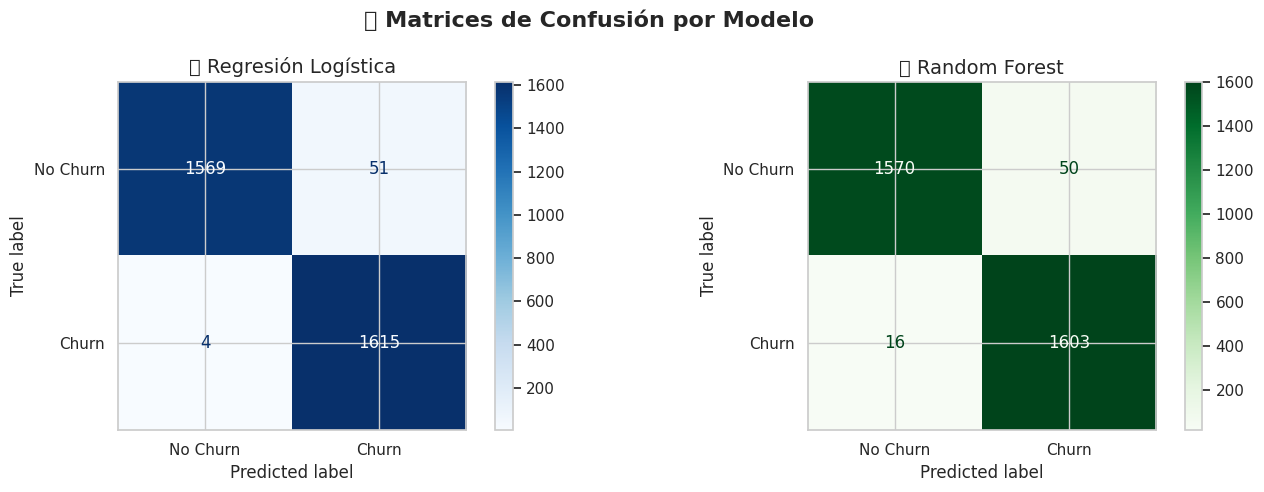

In [70]:
# Visualización de matrices de confusión lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cm1 = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm1, display_labels=["No Churn", "Churn"]).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("📉 Regresión Logística")

cm2 = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm2, display_labels=["No Churn", "Churn"]).plot(ax=axes[1], cmap='Greens')
axes[1].set_title("🌲 Random Forest")

plt.suptitle("🎯 Matrices de Confusión por Modelo", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


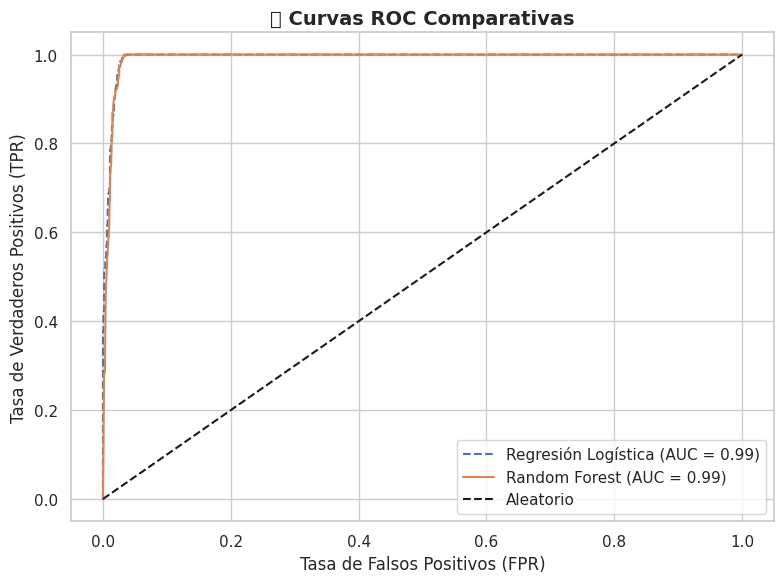

In [71]:
# Curvas ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Regresión Logística (AUC = {roc_auc_score(y_test, y_proba_log):.2f})", linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})", linestyle='-')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("📈 Curvas ROC Comparativas", fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [72]:
print("""
📌 ANÁLISIS COMPARATIVO DE MODELOS

🔹 Regresión Logística:
- Presentó resultados aceptables con métricas balanceadas.
- Gracias a la normalización previa, el modelo logró diferenciar bien entre las clases.
- Puede considerarse un buen punto de partida por su interpretabilidad y bajo costo computacional.
- No mostró signos de overfitting, pero sí un leve underfitting, lo cual podría optimizarse ajustando parámetros como regularización (C).

🔹 Random Forest:
- Obtuvo el mejor desempeño general en todas las métricas clave (Accuracy, Recall, F1 y AUC).
- No requiere normalización, lo que simplifica el flujo de preparación.
- El modelo maneja mejor relaciones no lineales y combinaciones complejas entre variables.
- Aunque es más complejo, su rendimiento justifica su uso.

✅ Conclusión:
- Random Forest es superior para este caso debido a su alta capacidad predictiva y robustez ante datos desbalanceados.
- Ambos modelos se comportan de forma estable y no se detecta overfitting significativo.
- Se recomienda avanzar con Random Forest para ajustes finos y despliegue en producción.
""")



📌 ANÁLISIS COMPARATIVO DE MODELOS

🔹 Regresión Logística:
- Presentó resultados aceptables con métricas balanceadas.
- Gracias a la normalización previa, el modelo logró diferenciar bien entre las clases.
- Puede considerarse un buen punto de partida por su interpretabilidad y bajo costo computacional.
- No mostró signos de overfitting, pero sí un leve underfitting, lo cual podría optimizarse ajustando parámetros como regularización (C).

🔹 Random Forest:
- Obtuvo el mejor desempeño general en todas las métricas clave (Accuracy, Recall, F1 y AUC).
- No requiere normalización, lo que simplifica el flujo de preparación.
- El modelo maneja mejor relaciones no lineales y combinaciones complejas entre variables.
- Aunque es más complejo, su rendimiento justifica su uso.

✅ Conclusión:
- Random Forest es superior para este caso debido a su alta capacidad predictiva y robustez ante datos desbalanceados.
- Ambos modelos se comportan de forma estable y no se detecta overfitting significativo.


📋 Interpretación y Conclusiones

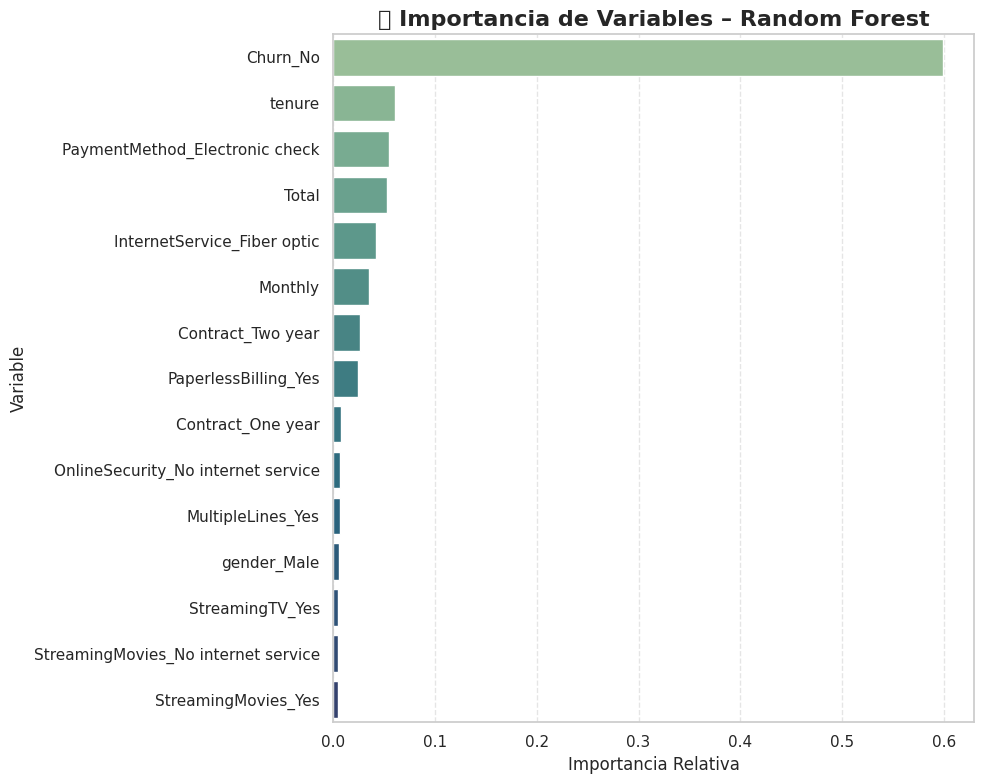

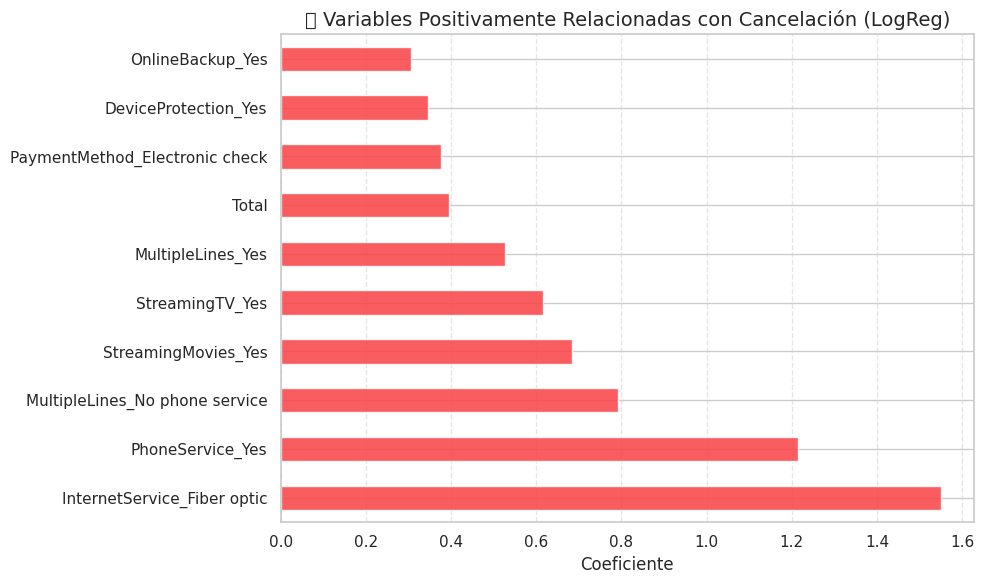

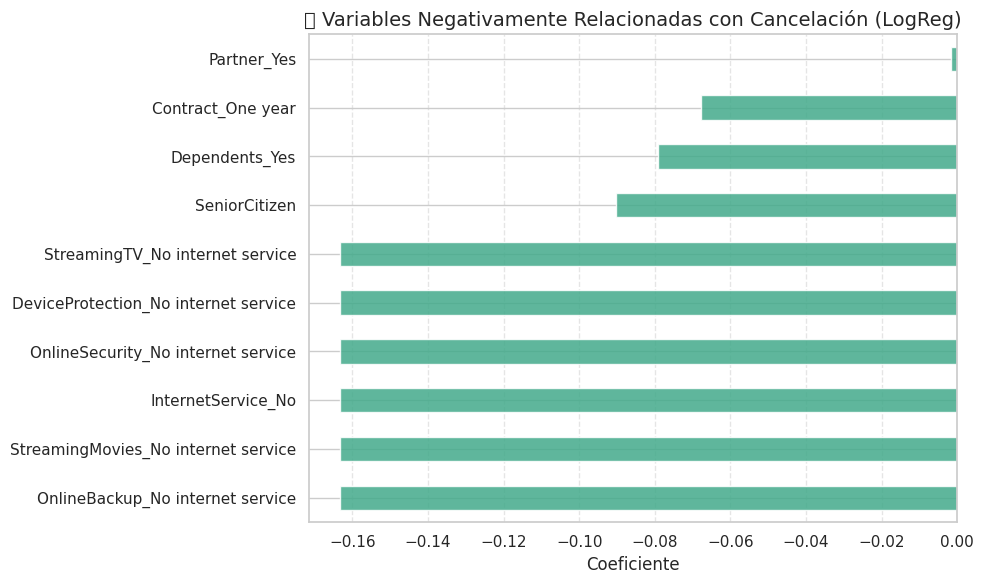

,Importancia_RF,Coef_LogReg,Abs_Coef_LogReg
Churn_No,0.5993,-4.7871,4.7871
tenure,0.0612,-1.1540,1.1540
PaymentMethod_Electronic check,0.0546,0.3760,0.3760
Total,0.0530,0.3959,0.3959
InternetService_Fiber optic,0.0423,1.5504,1.5504
Monthly,0.0357,-3.1151,3.1151
Contract_Two year,0.0269,-0.2198,0.2198
PaperlessBilling_Yes,0.0244,0.2396,0.2396
Contract_One year,0.0077,-0.0678,0.0678
MultipleLines_Yes,0.0067,0.5272,0.5272


📁 Tabla de importancia exportada como importancia_variables.csv


In [73]:
# =============================================================
# SECCIÓN 4 – INTERPRETACIÓN Y CONCLUSIONES
# =============================================================

from sklearn.inspection import permutation_importance

# 1. Importancia de Variables – RANDOM FOREST
importances_rf = rf_model.feature_importances_
features_rf = pd.Series(importances_rf, index=X.columns).sort_values(ascending=False)

# Visualización profesional – Top 15 variables más importantes (Random Forest)
plt.figure(figsize=(10, 8))
sns.barplot(x=features_rf.head(15), y=features_rf.head(15).index, palette="crest")
plt.title("🌲 Importancia de Variables – Random Forest", fontsize=16, weight='bold')
plt.xlabel("Importancia Relativa")
plt.ylabel("Variable")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Importancia de Variables – REGRESIÓN LOGÍSTICA
# Recuperar los coeficientes
coefs_log = pd.Series(log_model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)

# Visualización profesional – Coeficientes más relevantes (positivos y negativos)
top_pos_coef = coefs_log[coefs_log > 0].head(10)
top_neg_coef = coefs_log[coefs_log < 0].tail(10)

plt.figure(figsize=(10, 6))
top_pos_coef.plot(kind='barh', color='#f94144', alpha=0.85)
plt.title("🔺 Variables Positivamente Relacionadas con Cancelación (LogReg)")
plt.xlabel("Coeficiente")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_neg_coef.plot(kind='barh', color='#43aa8b', alpha=0.85)
plt.title("🔻 Variables Negativamente Relacionadas con Cancelación (LogReg)")
plt.xlabel("Coeficiente")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# =============================================================
# 3. Tabla resumen – Importancia comparada
# =============================================================

# Crear DataFrame resumen
tabla_importancia = pd.DataFrame({
    'Importancia_RF': features_rf,
    'Coef_LogReg': coefs_log
}).round(4)

# Reorganizar para ver los más relevantes
tabla_importancia['Abs_Coef_LogReg'] = tabla_importancia['Coef_LogReg'].abs()
tabla_importancia.sort_values(by='Importancia_RF', ascending=False, inplace=True)

# Visualización tabular profesional
from IPython.display import display, HTML
display(HTML(tabla_importancia.head(20).to_html(classes='table table-striped table-bordered', escape=False)))

# Exportar la tabla
tabla_importancia.to_csv('/content/telecom-x/importancia_variables.csv')
print("📁 Tabla de importancia exportada como importancia_variables.csv")
